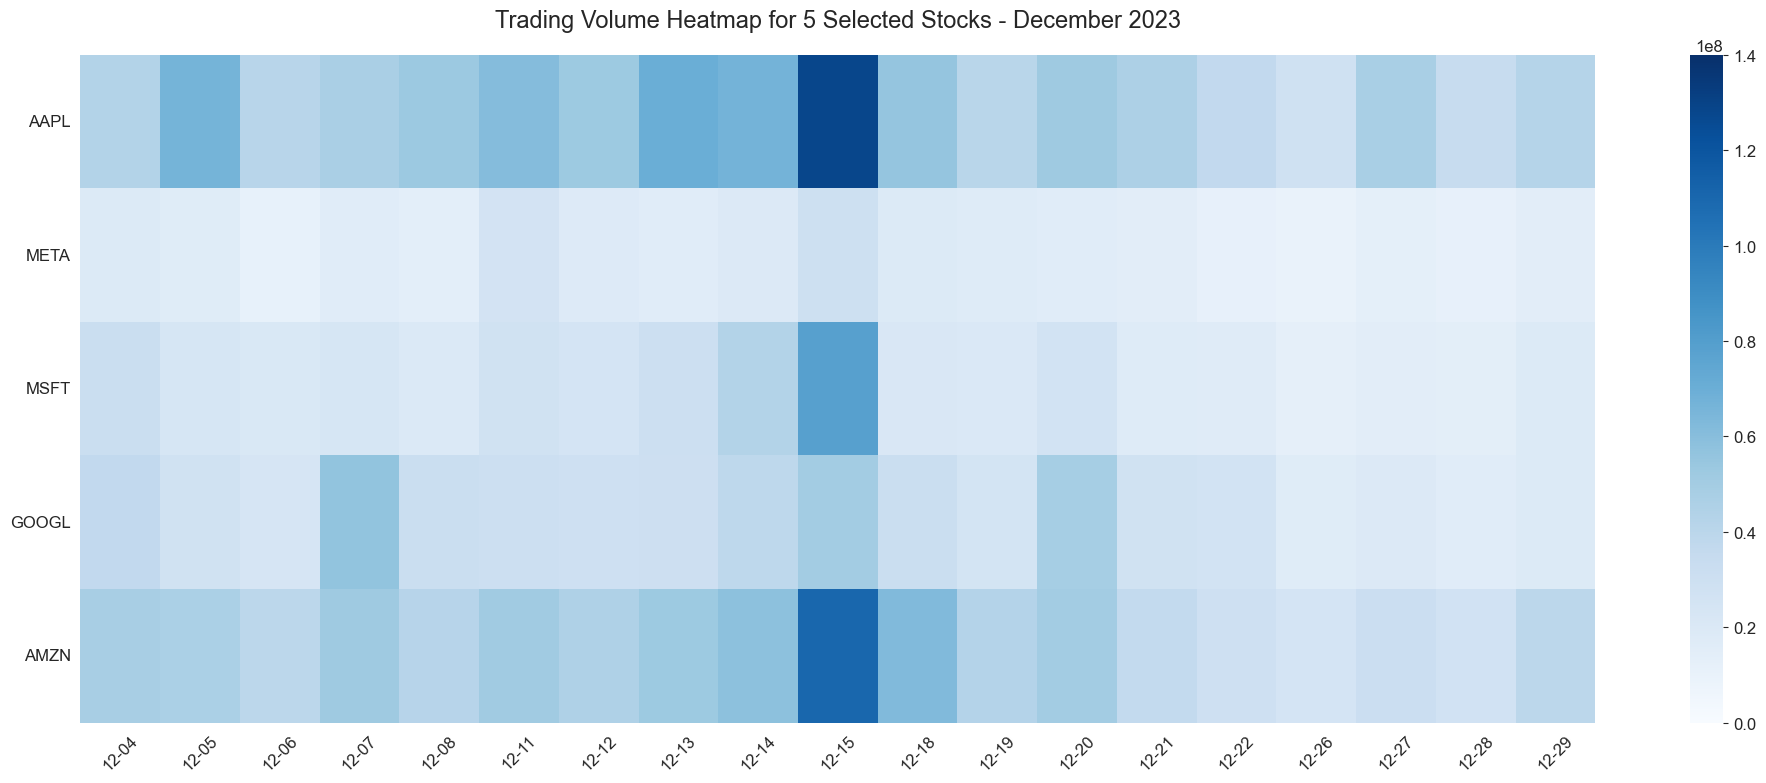

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams
import seaborn as sns
from datetime import timedelta
sns.set_style("white")

# Set the font
font = 'sans-serif'  
rcParams['font.family'] = font
rcParams['font.size'] = 12

# Selecting the FAANG stocks (excluding Facebook)
stocks = ['AAPL', 'META', 'MSFT', 'GOOGL', 'AMZN']

# Setting the date range for the past month
end_date = pd.Timestamp.now() + timedelta(days=1)
start_date = end_date - pd.DateOffset(months=1)

# Fetching the trading volume data for each stock
volume_data = pd.DataFrame()

for stock in stocks:
    data = yf.download(stock, start=start_date, end=end_date, progress=False)
    volume_data[stock] = data['Volume']

# Ensure the index is a datetime index
volume_data.index = pd.to_datetime(volume_data.index)

# Generating x-axis labels for each day
daily_ticks = pd.date_range(start=start_date, end=end_date, freq='D')

# Manually finding the positions for the tick labels
tick_positions = list(range(len(volume_data.index)))

# Transposing the data for the heatmap
volume_data_transposed = volume_data.T

# Creating a heatmap with vmax set to 1.4
plt.figure(figsize=(20, 8))
ax = sns.heatmap(volume_data_transposed, cmap='Blues', vmax=1.4e8, vmin=0)
plt.title('Trading Volume Heatmap for 5 Selected Stocks - December 2023',fontsize = 17, pad=20)
plt.xlabel('')  # Set xlabel to empty to avoid cutting off the year
plt.ylabel('')

# Center the x-ticks in the middle of the day cells
# Adjust tick positions by adding 0.5 to center them
adjusted_tick_positions = [pos + 0.5 for pos in tick_positions]

# Apply the adjusted tick positions
ax.set_xticks(adjusted_tick_positions)
ax.set_xticklabels([tick.strftime('%m-%d') for tick in volume_data.index], rotation=45)

# Rotate y-tick labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Adjust layout to make room for the x-axis labels
plt.tight_layout()

plt.show()